In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import sqrt
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [125]:
df = pd.read_csv('../data/student-por.csv')
df.shape

(649, 33)

In [126]:
df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,no,yes,yes,yes,yes,no,5,4,2,1,2,5,6,12,12,13
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,13,12,13
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,2,10,13,13
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,2,2,1,1,1,0,15,16,17
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,no,yes,yes,yes,yes,no,5,5,1,1,1,5,0,12,12,13


In [127]:
print(df['G3'].describe())

count    649.000000
mean      11.906009
std        3.230656
min        0.000000
25%       10.000000
50%       12.000000
75%       14.000000
max       19.000000
Name: G3, dtype: float64


In [128]:
#print(df.shape[0])
#cutpoint = df['G3'].mean()+2* df['G3'].std()
#print(cutpoint)
#df=df[df['G3']<=cutpoint].copy()
#print(df.shape[0])

In [129]:
df['Gender']=np.where(df['sex']=='M', 0,1)
df['SchoolName']=np.where(df['school']=='GP', 0,1)
df['FamilySize']=np.where(df['famsize']=='GT3', 1,0)
df['MomEmployed']=np.where(df['Mjob']=='at_home', 0,1)
df['DadEmployed']=np.where(df['Fjob']=='at_home', 0,1)
df.head(10)



,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Gender,SchoolName,FamilySize,MomEmployed,DadEmployed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11,1,0,1,0,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11,1,0,1,0,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12,1,0,0,0,1
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14,1,0,1,1,1
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13,1,0,1,1,1
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,no,yes,yes,yes,yes,no,5,4,2,1,2,5,6,12,12,13,0,0,0,1,1
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,13,12,13,0,0,0,1,1
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,2,10,13,13,1,0,1,1,1
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,2,2,1,1,1,0,15,16,17,0,0,0,1,1
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,no,yes,yes,yes,yes,no,5,5,1,1,1,5,0,12,12,13,0,0,1,1,1


In [130]:
print(df['Fjob'].value_counts())

other       367
services    181
at_home      42
teacher      36
health       23
Name: Fjob, dtype: int64


In [131]:
print(df['traveltime'].value_counts())

1    366
2    213
3     54
4     16
Name: traveltime, dtype: int64


In [132]:
df['ParentsEmployed'] = df['MomEmployed']+df['DadEmployed']
df['ParentsEmployed'].describe()

count    649.000000
mean       1.727273
std        0.504191
min        0.000000
25%        2.000000
50%        2.000000
75%        2.000000
max        2.000000
Name: ParentsEmployed, dtype: float64

In [133]:
df[['G3','SchoolName','Gender','ParentsEmployed','age','FamilySize','traveltime','studytime','famrel']].isnull().sum()

G3                 0
SchoolName         0
Gender             0
ParentsEmployed    0
age                0
FamilySize         0
traveltime         0
studytime          0
famrel             0
dtype: int64

In [134]:
df[['G3','SchoolName','Gender','ParentsEmployed','age','FamilySize','traveltime','studytime','famrel']].dtypes

G3                 int64
SchoolName         int64
Gender             int64
ParentsEmployed    int64
age                int64
FamilySize         int64
traveltime         int64
studytime          int64
famrel             int64
dtype: object

In [135]:
# declare features and target
features = ['Gender','ParentsEmployed','age','FamilySize','traveltime','studytime','famrel']
y = df['G3']
X = df[features]
print(y.shape, X.shape)

(649,) (649, 7)


In [136]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state=12)

In [137]:
# Fit the model to the training dataset
mymodel = LinearRegression()
mymodel.fit(X_train, y_train)

LinearRegression()

In [138]:
# coefficients and intercept
mymodel.intercept_


12.679987566680596

In [139]:
mymodel.coef_

array([ 0.96781269,  0.52280173, -0.26877691, -0.49953122, -0.29443065,
        0.91884155,  0.32948573])

In [140]:
# what is the equation for this model?
cols=list(X.columns)
coefs=list(mymodel.coef_)
xcoefs = [(coefs[i], cols[i]) for i in range(0, len(cols))]
equation = f'y = {round(mymodel.intercept_,4)} + {round(xcoefs[0][0],4)}*{xcoefs[0][1]} + {round(xcoefs[1][0],4)}*{xcoefs[1][1]} + {round(xcoefs[2][0],4)}*{xcoefs[2][1]} + {round(xcoefs[3][0],4)}*{xcoefs[3][1]}+ {round(xcoefs[4][0],4)}*{xcoefs[4][1]}+ {round(xcoefs[5][0],4)}*{xcoefs[5][1]} + {round(xcoefs[6][0],4)}*{xcoefs[6][1]} '
print("Regression Equation: ", equation)  

Regression Equation:  y = 12.68 + 0.9678*Gender + 0.5228*ParentsEmployed + -0.2688*age + -0.4995*FamilySize+ -0.2944*traveltime+ 0.9188*studytime + 0.3295*famrel 


In [141]:
cols=list(X.columns)
cols

['Gender',
 'ParentsEmployed',
 'age',
 'FamilySize',
 'traveltime',
 'studytime',
 'famrel']

In [142]:
coefs=list(mymodel.coef_)
xcoefs = [(coefs[i], cols[i]) for i in range(0, len(cols))]
xcoefs

[(0.9678126943953008, 'Gender'),
 (0.5228017348942141, 'ParentsEmployed'),
 (-0.268776911285479, 'age'),
 (-0.4995312199806275, 'FamilySize'),
 (-0.29443064922253376, 'traveltime'),
 (0.9188415496713099, 'studytime'),
 (0.32948573443360374, 'famrel')]

In [143]:
# Predict the y-values on the testing dataset & examine the first few
y_preds = [int(x) for x in mymodel.predict(X_test)]
print(list(y_test[:5]))
print(y_preds[:5])

[11, 15, 15, 17, 17]
[10, 12, 12, 12, 11]


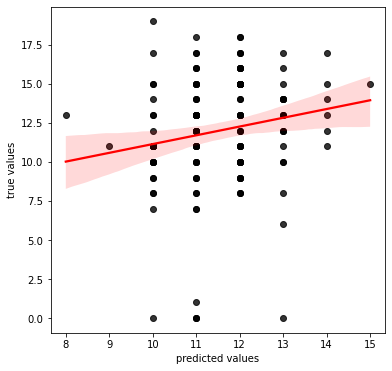

In [144]:
# compare predictions to known values
plt.figure(figsize=(6,6))
ax = sns.regplot(x = y_preds, 
                 y = y_test, 
                 scatter_kws={"color": "black"}, 
                 line_kws={"color": "red"})
ax.set(xlabel='predicted values', ylabel='true values');

In [145]:
# R-2 (coefficient of determination)
r2 = metrics.r2_score(y_test, y_preds)
round(r2, 2)

-0.01

In [146]:
# root mean sq error
rmse = sqrt(metrics.mean_squared_error(y_test, y_preds))
rmse

3.5541386917916973

In [147]:
# is that more or less than if we just used the average as our model?
avg_val = y_train.mean()
comparison = np.full((len(y_test), ), avg_val)
baseline=sqrt(metrics.mean_squared_error(y_test, comparison))
print(round(baseline,2))
print(round(rmse,2))
print('improvement:',round(rmse-baseline,2))

3.54
3.55
improvement: 0.01


In [148]:
print(equation)

y = 12.68 + 0.9678*Gender + 0.5228*ParentsEmployed + -0.2688*age + -0.4995*FamilySize+ -0.2944*traveltime+ 0.9188*studytime + 0.3295*famrel 


In [149]:
fake1= [[0, 2, 12, 0, 1, 4, 1]]

In [150]:
for data in [fake1]:
    Gender=data[0][0]
    ParentsEmployed=data[0][1]
    age=data[0][2]
    FamilySize=data[0][3]
    traveltime=data[0][4]
    studytime=data[0][5]
    famrel=data[0][6]

    y = 15.3674 + 0.5267*Gender + 0.5788*ParentsEmployed + -0.3711*age + -0.1345*FamilySize+ -0.4173*traveltime+ 0.7992*studytime + 0.1438*famrel   
    print('Grade: ',int(y))

Grade:  14
